# <p style="font-family:newtimeroman;font-size:100%;color:green;text-align:center;border-radius:10px 10px;"><b>Template NB</b></p>

# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Import Libraries</b></p>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 4)
import warnings
warnings.filterwarnings('ignore')

# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Load Data</b></p>

In [99]:
df = pd.read_csv('Sleep_Efficiency.csv')
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>EDA</b></p>

In [100]:
df.shape

(452, 15)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [102]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

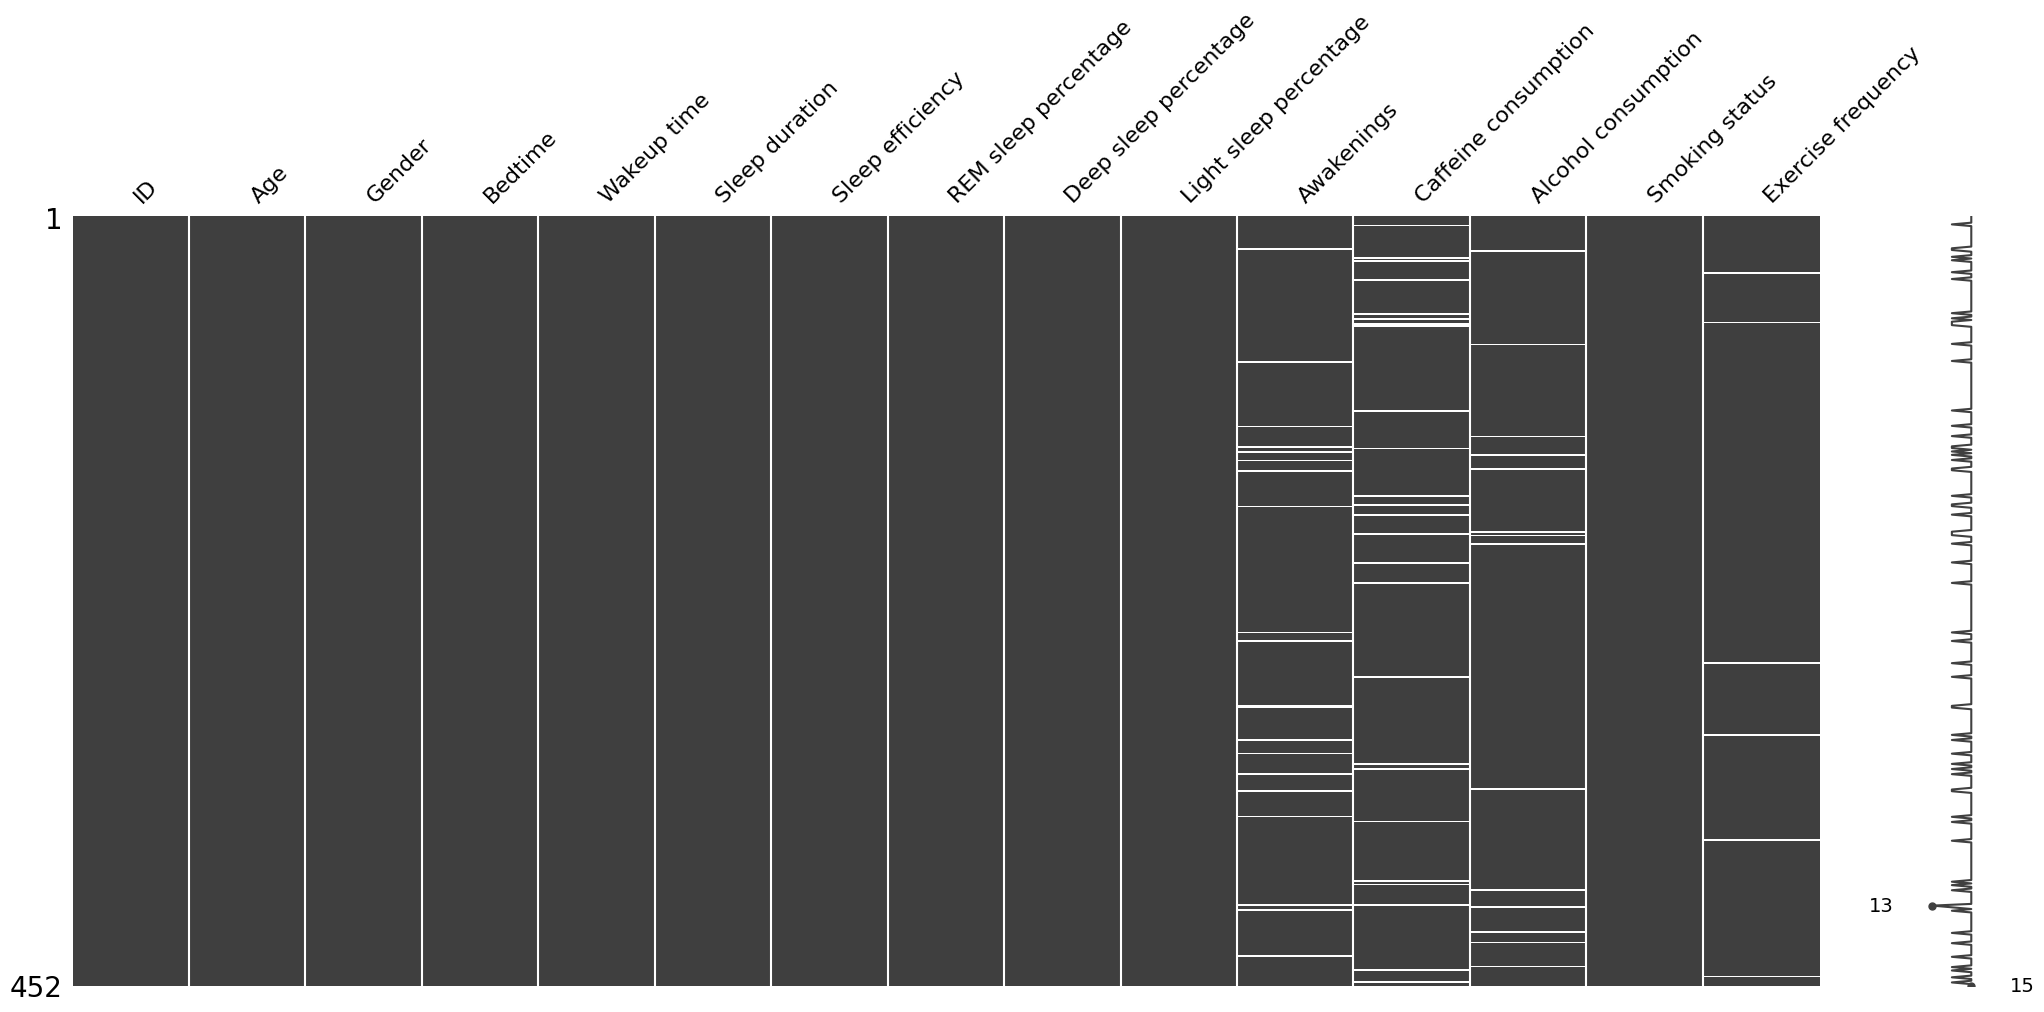

In [103]:
import missingno as msno
msno.matrix(df);

# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Handling Missing Values</b></p>

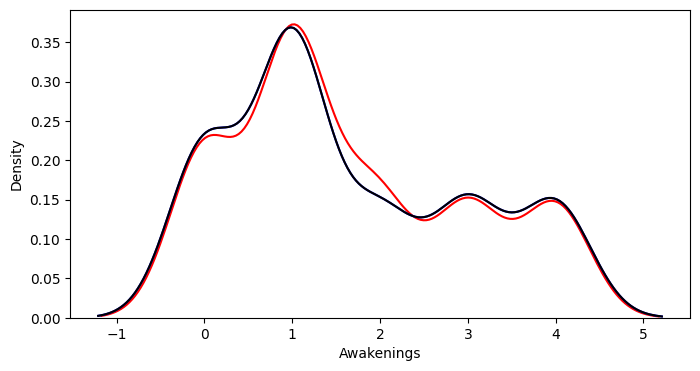

In [104]:
a = df.Awakenings.fillna(df.Awakenings.mean())
b = df.Awakenings.fillna(df.Awakenings.mode())
sns.kdeplot(a,color='red' )
sns.kdeplot(b, color='blue')
sns.kdeplot(df.Awakenings, color='black');

In [105]:
df.Awakenings = df.Awakenings.fillna(df.Awakenings.mean())

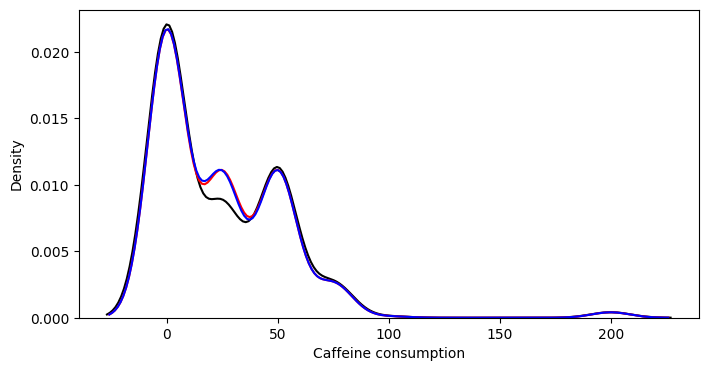

In [106]:
a = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
b = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
sns.kdeplot(df['Caffeine consumption'], color='black');
sns.kdeplot(a, color='red');
sns.kdeplot(b, color='blue');

In [107]:
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())

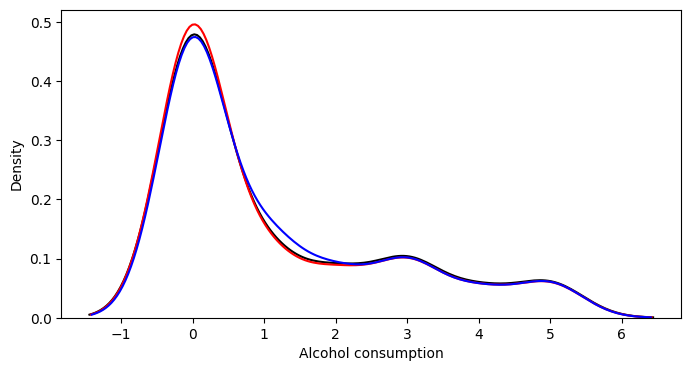

In [108]:
a = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
b = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())
sns.kdeplot(df['Alcohol consumption'], color='black');
sns.kdeplot(a, color='red');
sns.kdeplot(b, color='blue');

In [109]:
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())

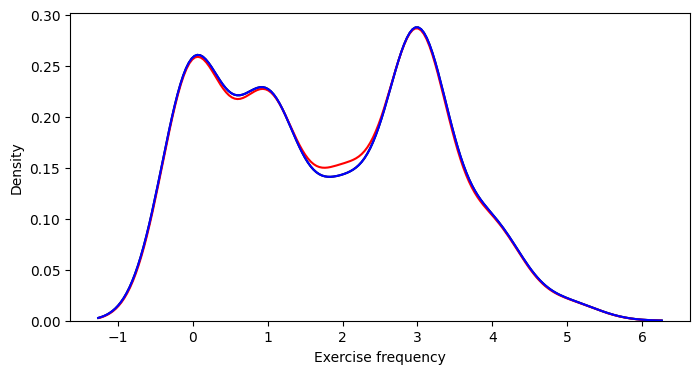

In [110]:
a = df['Exercise frequency'].fillna(df['Exercise frequency'].median())
b = df['Exercise frequency'].fillna(df['Exercise frequency'].mode())
sns.kdeplot(df['Exercise frequency'], color='black');
sns.kdeplot(a, color='red');
sns.kdeplot(b, color='blue');

In [111]:
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())

In [112]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

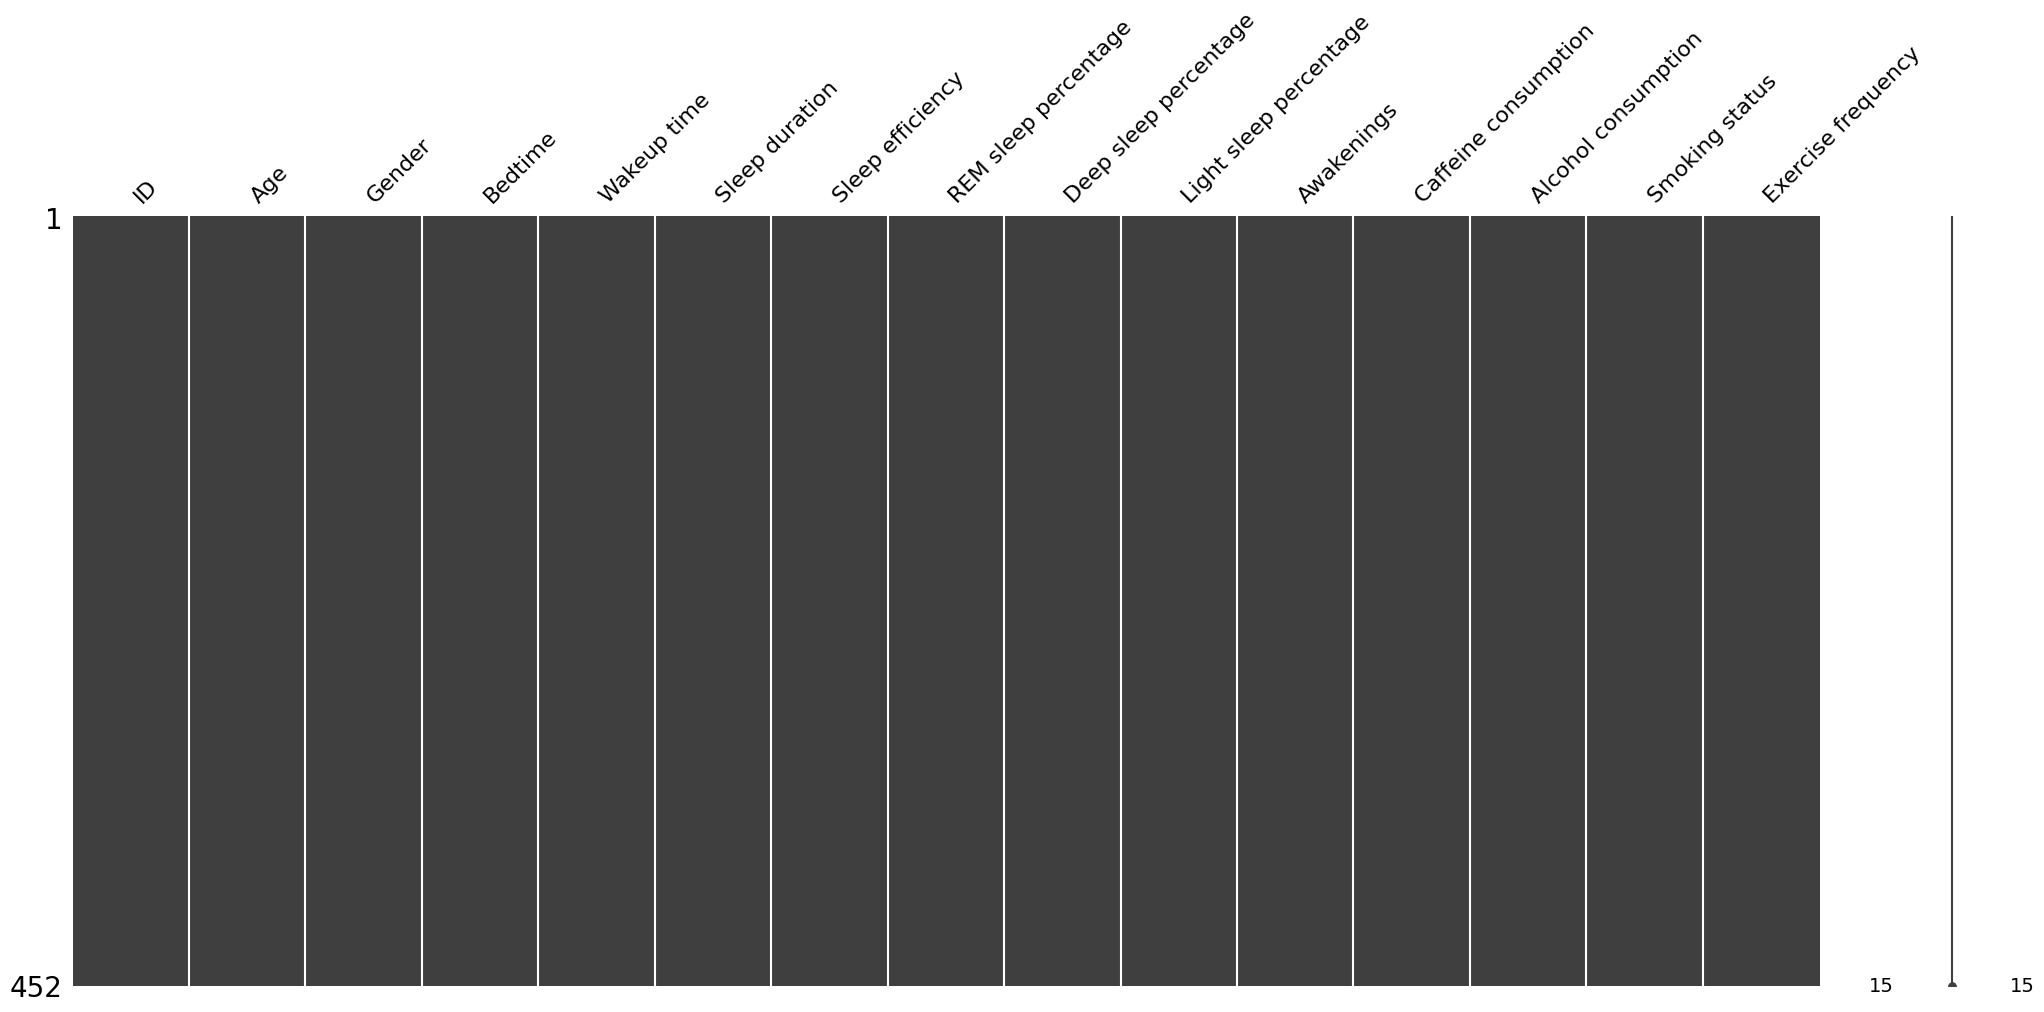

In [113]:
import missingno as msno
msno.matrix(df);

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,452.0,226.500000,130.625419,1.0,113.7500,226.50,339.25,452.00
Age,452.0,40.285398,13.172250,9.0,29.0000,40.00,52.00,69.00
Sleep duration,452.0,7.465708,0.866625,5.0,7.0000,7.50,8.00,10.00
Sleep efficiency,452.0,0.788916,0.135237,0.5,0.6975,0.82,0.90,0.99
REM sleep percentage,452.0,22.615044,3.525963,15.0,20.0000,22.00,25.00,30.00
Deep sleep percentage,452.0,52.823009,15.654235,18.0,48.2500,58.00,63.00,75.00
Light sleep percentage,452.0,24.561947,15.313665,7.0,15.0000,18.00,32.50,63.00
Awakenings,452.0,1.641204,1.326338,0.0,1.0000,1.00,3.00,4.00
Caffeine consumption,452.0,23.727876,29.355363,0.0,0.0000,25.00,50.00,200.00
Alcohol consumption,452.0,1.137168,1.608938,0.0,0.0000,0.00,2.00,5.00


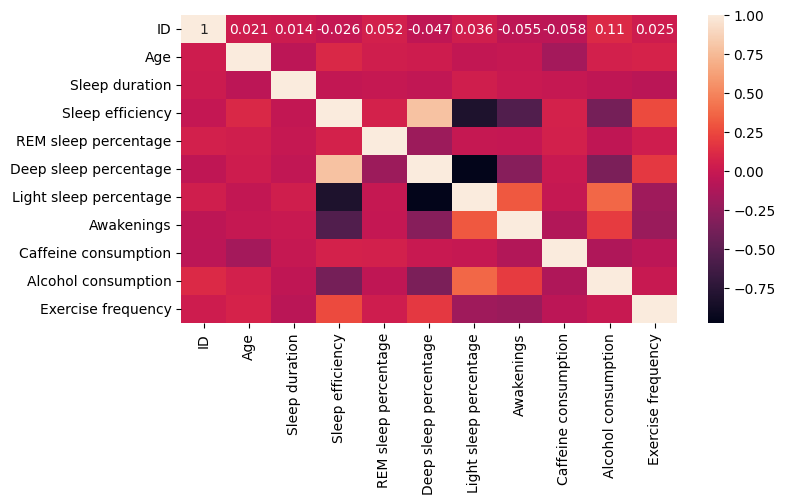

In [115]:
sns.heatmap(df.corr(numeric_only=True), annot = True);
#sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={"size":.8})

In [116]:
df.drop(['ID', 'Bedtime', 'Wakeup time'], axis=1, inplace=True)

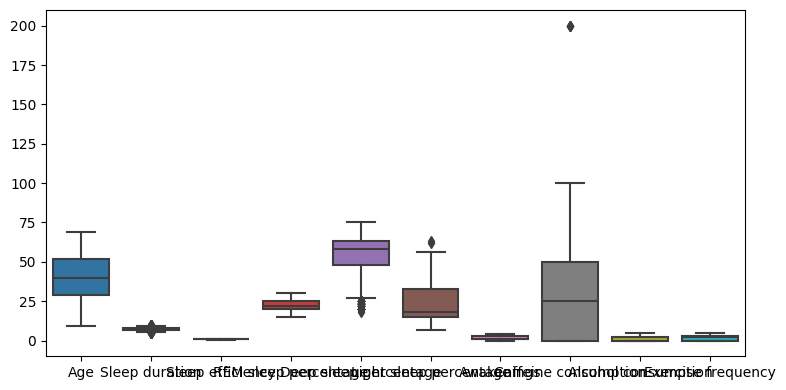

In [117]:
sns.boxplot(df);
plt.tight_layout()

In [118]:
from summarytools import dfSummary
dfSummary(df, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 40.3 (13.2)min < med < max:9.0 < 40.0 < 69.0IQR (CV) : 23.0 (3.1),61 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dQY7aMBSA4ecyoABSEEKCHReo1AVLDtHD9ghdcAJuwA4JoSDSiQgh3VRVR5oCseOJn+f/9qFZ/PI4tRObuq4FCN2Xrm8AeMZL1zfgizFmKCIDh5+41HX92tb9wE2UoRpjhrPZ7HuaplPb3zidTkdjzA9iDUOUoYrIIE3T6Xq9fp1MJkXTi7MsSzabzfRwOAxEhFADEGuoIiIymUyK+Xz+y/LyYas380EcpzzBTneiDvWzcZ3yhDzdIdS4WE95Qp/uEGqEHKY8wU53+H9UqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFAh6CVUh51A6e1267d9P8+KdQdTl4IN1WUnUFmWSVVVX4ui+Ckittv8rMS8g6lLwYYqDjuBdrvddLvdjq7Xa8/Xzd0R7Q6mLoUcqojY7QQ6Ho+d7wKKcQdTl4IP9bOpqqovIqkxxubyTufmPhFqQPI875dl+W25XPZ6vV7jd726nJv7Rqj/4TCyWY9ql8vlJUmS0Wq1KhaLxbHp9R3Pzb0i1He4jGxtjGrj8dhqfhvC3NwXQn2Hy8gW86jWJUK9w2Zki3lU6xJLqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGA/Kv5yfLFQxOPHMwgVIuL+YqGI349nECpExP3FQt8fzyBUvGH7YuEf3l7D4WEKKhAqVCBUqECoUIFQoQJP/WiN44LB3cUCQkUrXBcMHi0WECpa4bJg8MxiAaGiVQ4LBncXC3iYggqEChW8/ul3PG8p2u/RozlvobqetxTz9+jRnM8R1fq8JRG+3Iy3vD/12563xJeb8S8epqDCwxFV68G5iMvdULUenIv4PBpRtR6ci8g89TCl9eBcxIOHKajw1IiaZVnS9IfP53MiIpLnebLf70cfeb3Wf1vrfbte/0xfvwHhsrLtLORz8gAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[object],1. Male2. Female,228 (50.4%)224 (49.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
3,Sleep duration[float64],1. 7.02. 8.03. 7.54. 6.05. 8.56. 9.07. 10.08. 5.09. 5.5,154 (34.1%)103 (22.8%)88 (19.5%)34 (7.5%)28 (6.2%)26 (5.8%)8 (1.8%)8 (1.8%)3 (0.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADnElEQVR4nO3dTU4bWQBG0WdkRZ2JLWSJxbCILLYX4d0ghAdNlIl70KTVdAbxT/mWZZ8zY/aQrh64VB8s9vv9gMLD3AfgfoiNjNjIiI2M2MiIjYzYyCzGGF/HGF/mPsjEfuz3+/e5D8Fny81m8221Wj3OfZAp7Xa718Vi8afgrstytVo9Pj8/v6/X6+9zH2YKb29vf2y328eXl5cvYwyxXZHlGGOs1+vvT09Pf819mAl9nfsA/MoHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLLMf55LWfug0zllr6XW7Pc7Xav2+32cdzQazm73e51jPFj7nPwmdfCySz8rQ8q13azuZFu2FUNXgxVbtvVDF4MVW7ftQ1ebuYTMb/yUJeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M1QxeruEMXNZVDV4MVW6b18LJGLyQ8QGBzJw/Rv3IvDOzrassqe7PLOsqS6r7NOe6avZHLbR8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMzy7rKkuo+zbausqS6P14LJ2NdReaUm82NxEmOHrwYqnCqowYvhiqc45TBi6EKJ/FQl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxRgxdDFc5x9ODFUIVTeS2cjMELmWNuNjcaZzl48GLowrkOGrwYujCFYwYvhi6cxUNdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc9C6yqqKKRy8rrKq4lw2CGSsq8gcerO51TjbQesqyyqm8Nt1lWUVUzl0XWVZxdk81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiPz28GLsQtTOWjwYuzCFLwWTsbghcz/bzY3GBfzafBi2MIlPfwcvDw/P79/RHfMv4OEg/07ePn42rCFi/FQl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBz074RgCv9dV1lRcVE2CGSsq8i42chYV5GxriJjXUXGQ10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IeC2cjMELmZ8323CjcWnLzWbzbYwxDF24tIfVavVo6ELBczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P8WFSNYVXFhdkgkLGuIuN3NjJiIyM2MmIjIzYyYiPzNyJpq1dk4zDeAAAAAElFTkSuQmCC"">",0(0.0%)
4,Sleep efficiency[float64],Mean (sd) : 0.8 (0.1)min < med < max:0.5 < 0.8 < 1.0IQR (CV) : 0.2 (5.8),50 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly

# <p style="font-family:newtimeroman;font-size:75%;color:purple;text-align:center;border-radius:10px 10px;"><b>ML Model</b></p>

In [124]:
from sklearn.preprocessing import LabelEncoder

LE_gender = LabelEncoder()
LE_smoking = LabelEncoder()

df['Gender'] = LE_gender.fit_transform(df['Gender'])
df['Smoking status'] = LE_gender.fit_transform(df['Smoking status'])

In [125]:
X = df.drop(columns='Sleep efficiency')
y = df['Sleep efficiency']

# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Data Split</b></p>

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [127]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (361, 11)
y Train features shape: (361,)
X Test features shape : (91, 11)
Y Test features shape : (91,)


# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Scaling</b></p>

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Modelling</b></p>

In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [137]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [138]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Model Performance</b></p>

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [140]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls 

,linear_train,linear_test
R2,0.800549,0.809435
mae,0.048748,0.047432
mse,0.003600,0.003607
rmse,0.060002,0.060056


# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Tuning (Grid Search, CV)</b></p>

In [141]:
from sklearn.model_selection import cross_validate, cross_val_score

In [144]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [145]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.800549,0.809435
mae,0.048748,0.047432
mse,0.003600,0.003607
rmse,0.060002,0.060056


# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Regularization</b></p>

In [146]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0, random_state = 42)

In [147]:
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [148]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.800547,0.809430
mae,0.048758,0.047427
mse,0.003600,0.003607
rmse,0.060002,0.060056


# <p style="font-family:newtimeroman;font-size:75%;color:green;text-align:center;border-radius:10px 10px;"><b>Final Model</b></p>